In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
sym.init_printing(use_latex="mathjax")
from ipywidgets import interact

In [3]:
v=0.25
lbg=0.1
k=0.0003
kbg=0.4
I0=300
mumax=1.2
romax=0.2
m=15
qmax=0.04
qmin=0.004
h=120
d=10


N=10000
zmax = 30
z = np.linspace(0,zmax,N)    # (start,stop, number of nodes)

Rd1_guess = 30               # as specified
A1_guess = 100
Rb1_guess = A1_guess/350

A1,Rb1,Rd1 = sym.symbols('A1 Rb1 Rd1')


In [8]:
Rb1_eqn = (A1*Rd1*romax*qmax)/(A1*m*lbg*(qmax-qmin)+romax*Rd1)

In [9]:
Rb1_eqn

   0.008⋅A₁⋅Rd₁   
──────────────────
0.054⋅A₁ + 0.2⋅Rd₁

In [35]:
l = -200
r = 200
myRd1 = np.linspace(l, r, 2000)
myA1 = np.linspace(l, r, 2000)
Rb1_np = sym.lambdify([A1,Rd1], Rb1_eqn, "numpy")

In [36]:
Rb1_np

<function _lambdifygenerated(A1, Rd1)>

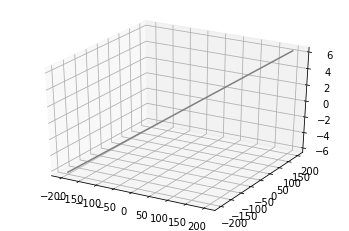

In [38]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
# https://www.wolframalpha.com/input/?i=plot+%280.008*x*y%29%2F%280.054*x+%2B+0.2*y%29

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
myRb1 = Rb1_np(myA1,myRd1)
ax.plot3D(myA1, myRd1, myRb1, 'gray')